# Supervised learning - Python - decision tree classification

In [1]:
import pandas as pd

dataset = pd.read_csv('data/social_network_ads.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15579781,Female,29,47000,0
1,15591433,Male,36,52000,0
2,15649136,Female,24,55000,0
3,15706071,Male,51,23000,1
4,15704583,Male,46,28000,1


In [2]:
X = dataset.iloc[:, [2, 3]].values
X[:5, :]

array([[   29, 47000],
       [   36, 52000],
       [   24, 55000],
       [   51, 23000],
       [   46, 28000]])

In [3]:
y = dataset.iloc[:, 4].values
y[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [4]:
# Feature Scaling
# decision tree are not based on euclidean space so we don't need to do feature scaling
# in this case, we apply feature scaling because of the higher resolution plot
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
X = sc.fit_transform(X.astype(np.float64))

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

# important parameters
# criterion : function that measures the quality of a split
# "gini" impurity or "entropy" for information gain, default is "gini"
# the most common decision trees are based on entropy, we want the terminal split to have a homogenous group of points
# we have less entropy in the child node than the parent node
# => if entropy is 0, that means that it is a fully homogenous group of users (only users of the same class)
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 5, 27]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


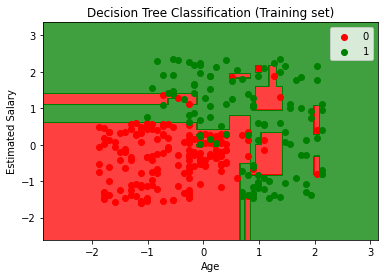

In [9]:
%matplotlib inline

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# this looks like overfitting

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


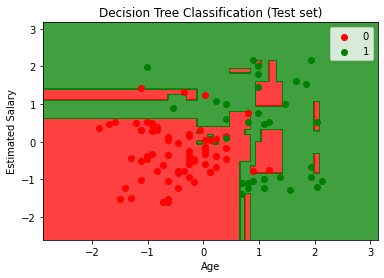

In [10]:
%matplotlib inline

# Visualising the Test set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()